# What did we cover in part 2?

In the past four weeks you have learned a TON in a very short amount of time. 

* Week 10 - Pandas
    * Series
    * Dataframe
    * Index
* Week 11 - Moar Pandas
    * Subsetting Data
    * Merging Data
    * Grouping Data
* Week 12 - Data Fitness
    * Split Apply Combine
    * Merging Real Data
    * Transpose
    * Pivot Tables
* Week 13 - Data Visualization
    * Matplotlib
    * Plotting with Pandas
    * Word Clouds
* Week 14 - Data Analysis
    * Descriptive Statistics
    * Z-Score
    * Correlation
    
---

## Pandas

* To understand Pandas it is helpful to start the data structures it adds to Python:
    * **Series** - For one dimensional data (lists) 
    * **Dataframe** - For two dimensional data (spreadsheets)
    * **Index** - For naming, selecting, and transforming data within a Pandas Series or Dataframe (column and row names)

### Loading Pandas

By convention, the Python data science community usually imports the Pandas library and giving it an alias `pd`.

In [2]:
# import pandas
import pandas as pd

### Series

* A one-dimensional array of indexed data
* Kind of like a blend of a Python list and dictionary
* You can create them from a Python list

In [4]:
# create two ordered lists
population_list = [38332521, 26448193, 19651127, 19552860, 12882135]
states = ['California', 'Texas', 'New York', 'Florida', 'Illinois']

# Create a Series from those two lists
population = pd.Series(population_list, index=states)

# display the data
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [5]:
# Then create another Series for the area
area_dict = {'Illinois': 149995, 'California': 423967, 
             'Texas': 695662, 'Florida': 170312, 
             'New York': 141297}
area = pd.Series(area_dict)
area

Illinois      149995
California    423967
Texas         695662
Florida       170312
New York      141297
dtype: int64

### DataFrame

* *DataFrames* are the real workhorse of Pandas and Python Data Science
* We will be spending a lot of time with data inside of Dataframes, so buckle up!
* DataFrames contain two-dimensional data, just like an Excel spreadsheet
* In practice, a DataFrame is a bunch of Series lined up next to each other

![Anatomy of a Dataframe](https://cdn-images-1.medium.com/max/1600/1*ZSehcrMtBWN7_qCWq_HiSg.png)

*Imaged used without permission from [Dunder Data](https://www.dunderdata.com/blog/selecting-subsets-of-data-in-pandas-part-1)*

In [6]:
# Create a dictionary with a key:value for each column
state_info_dictionary = {'population': population,
                       'area': area}
state_info_dictionary

{'population': California    38332521
 Texas         26448193
 New York      19651127
 Florida       19552860
 Illinois      12882135
 dtype: int64,
 'area': Illinois      149995
 California    423967
 Texas         695662
 Florida       170312
 New York      141297
 dtype: int64}

In [7]:
# Now mash them together into a DataFrame
states = pd.DataFrame(state_info_dictionary)
# Display the data
states

,population,area
California,38332521,423967
Florida,19552860,170312
Illinois,12882135,149995
New York,19651127,141297
Texas,26448193,695662


### Index

* Pandas `Series` and `DataFrames` are containers for data
* The Index (and Indexing) is the mechanism to make that data retrievable
* In a `Series` the index is the key to each value in the list
* In a `DataFrame` the index is the column names, but there is also an index for each row
* Indexing allows you to merge or join disparate datasets together

### Reading Files into a Dataframe

* Once your data is in a Pandas `DataFrame` you can easily use a ton of analytical tools
* You just have to get your data to fit into a dataframe
* Getting data to fit is a big part of the "data janitor" work...it is the craft of data carpentry
* However, as we will see, there is still a lot of carpentry work to do once your data fits into a `DataFrame`

In [8]:
# Open a file called dogs.csv in the files folder and read it into a dataframe
dogs_data = pd.read_csv("files/dogs.csv")
dogs_data

,LicenseType,Breed,Color,DogName,OwnerZip,ExpYear,ValidDate
0,Dog Lifetime Spayed Female,LABRADOR RETRIEVER,YELLOW,SASHA,15137,2099,2005-01-31T00:00:00
1,Dog Lifetime Neutered Male,LABRADOR RETRIEVER,BROWN,JAKE,15129,2099,2004-06-21T00:00:00
2,Dog Lifetime Spayed Female,MIXED,SPOTTED,SHILOH,15129,2099,2006-01-20T00:00:00
3,Dog Lifetime Spayed Female,LAB MIX,BROWN,BLONDIE,15140,2099,2005-07-18T00:00:00
4,Dog Lifetime Spayed Female,AUS SHEPHERD,MULTI,SASHA,15238,2099,2004-02-25T00:00:00
...,...,...,...,...,...,...,...
34516,Dog Lifetime Spayed Female,LABRADOR RETRIEVER,YELLOW,LELA,15108,2099,2017-05-31T15:33:00
34517,Dog Lifetime Neutered Male,POMERANIAN MIX,BLACK,SPARTACUS,15108,2099,2017-05-31T15:08:42
34518,Dog Lifetime Male,GOLDENDOODLE,BROWN,PARKER,15025,2099,2017-05-31T15:33:00
34519,Dog Lifetime Spayed Female,MIXED,WHITE/BLACK,LILLY,15241,2099,2017-05-31T15:33:01


* Notice that Pandas figured out there is a header row 
* Pandas also has a special function, `head(n)` for looking at the first *n* rows in a dataframe

In [51]:
# Use the head function to look at the "head" 
# of the dataframe. Default is 5 rows.
dogs_data.head()

,LicenseType,Breed,Color,DogName,OwnerZip,ExpYear,ValidDate
0,Dog Lifetime Spayed Female,LABRADOR RETRIEVER,YELLOW,SASHA,15137,2099,2005-01-31T00:00:00
1,Dog Lifetime Neutered Male,LABRADOR RETRIEVER,BROWN,JAKE,15129,2099,2004-06-21T00:00:00
2,Dog Lifetime Spayed Female,MIXED,SPOTTED,SHILOH,15129,2099,2006-01-20T00:00:00
3,Dog Lifetime Spayed Female,LAB MIX,BROWN,BLONDIE,15140,2099,2005-07-18T00:00:00
4,Dog Lifetime Spayed Female,AUS SHEPHERD,MULTI,SASHA,15238,2099,2004-02-25T00:00:00


### Computing on Columns

* You can use mathematical operations to quickly do computations on your data

In [56]:
# display the states dataframe
states

,population,area
California,38332521,423967
Florida,19552860,170312
Illinois,12882135,149995
New York,19651127,141297
Texas,26448193,695662


In [57]:
# Increase the population by 25%
states["population"] * 1.25

California    47915651.25
Florida       24441075.00
Illinois      16102668.75
New York      24563908.75
Texas         33060241.25
Name: population, dtype: float64

In [58]:
# Compute the density of each state
states['population'] /  states['area']

California     90.413926
Florida       114.806121
Illinois       85.883763
New York      139.076746
Texas          38.018740
dtype: float64

In [59]:
# save the result to a new column labeled "density"
states['density'] =  states['population'] / states['area']
states

,population,area,density
California,38332521,423967,90.413926
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763
New York,19651127,141297,139.076746
Texas,26448193,695662,38.018740


### Vectorized String Operations

* This column centric approach can be used with string methods
* The `str` *accessor* provides access to a bunch of *string methods* 

|Functions  | |  | |
|-------------|------------------|------------------|------------------|
|``len()``    | ``lower()``      | ``translate()``  | ``islower()``    | 
|``ljust()``  | ``upper()``      | ``startswith()`` | ``isupper()``    | 
|``rjust()``  | ``find()``       | ``endswith()``   | ``isnumeric()``  | 
|``center()`` | ``rfind()``      | ``isalnum()``    | ``isdecimal()``  | 
|``zfill()``  | ``index()``      | ``isalpha()``    | ``split()``      | 
|``strip()``  | ``rindex()``     | ``isdigit()``    | ``rsplit()``     | 
|``rstrip()`` | ``capitalize()`` | ``isspace()``    | ``partition()``  | 
|``lstrip()`` |  ``swapcase()``  |  ``istitle()``   | ``rpartition()`` |



In [9]:
# Capitalize the DogName column
dogs_data["DogName"].str.capitalize()

0             Sasha
1              Jake
2            Shiloh
3           Blondie
4             Sasha
            ...    
34516          Lela
34517     Spartacus
34518        Parker
34519         Lilly
34520    Bella fodi
Name: DogName, Length: 34521, dtype: object

### Writing CSV Files

* If you have your data loaded into a Dataframe you can easily write it to a file with the `to_csv()` method
* There are also functions for writing to a bunch of different datatypes (excel, json, sql, etc.)


In [10]:
# create a list of lists, each sub-list is an observation/row
dead_people_list = [
    [1,"Bob","Jones",200],
    [2,"Jane","Jones",199],
    [3,"Ethel","Jones",180],
    [4,"Hortense","Jones",178],
    [5,"Vern","Jones",178]
]

# specify the column names seperately
column_names = ["ssn","first_name", "last_name", "age"]

# make a Dataframe with column names specified separately
dead_people = pd.DataFrame(dead_people_list, columns=column_names)
dead_people

,ssn,first_name,last_name,age
0,1,Bob,Jones,200
1,2,Jane,Jones,199
2,3,Ethel,Jones,180
3,4,Hortense,Jones,178
4,5,Vern,Jones,178


In [11]:
# use the to_csv function to write it to a file
dead_people.to_csv("dead_people.csv", index=False)

## Moar Pandas

* It is sometimes helpful to think of a Pandas Dataframe as a little database. 
* There is data and information stored in the Pandas Dataframe (or Series) and you want to *retrieve* it.
* Pandas has multiple mechanisms for getting specific bits of data and information from its data structures. 

### Masking: Filtering by Values

* The most common is to use *masking* to select just the rows you want. 
* Masking is a two stage process, first you create a sequence of boolean values (corresponding to rows in your data) based upon a conditional expression--which you can think of as a "query"--and then you index your dataframe using that boolean sequence. 

In [13]:
# read the data into a pandas dataframe
order_data  = pd.read_csv("files/chipotle.tsv", sep="\t")
# inspect the dataframe
order_data.head() 

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


* How might we only look at particular orders?
* First step is to create a *query mask*, a list of `True/False` values for rows that satisfy a particular condition.
* Use the query mask to create a subset of the data

In [14]:
# create a query mask for chicken bowls
query_mask = order_data['item_name'] == "Chicken Bowl"

chicken_bowls = order_data[query_mask]
chicken_bowls.head()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49


### Merging Data

* Bringing disparate datasets together is one of the more powerful features of Pandas
* Like with Python lists, you can `append()` and `concat()` Pandas `Series` and `Dataframes`
* The `concat` is a module function, you call it directly from the pandas module (usually called `pd`)

In [15]:
# concatinate two series together
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2]) #note the Seres are passed as a list

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

### Merging and Joining

* While `concat()` is useful it lacks the power to do complex data merging
* For example, I have two tables of different data but one shared column
* This is where the `merge()` function becomes useful because it lets you *join* datasets
* The concept of "join" has lots of theory and is a richly developed method for *joining* data

In [16]:
# create two dataframes with one shared column
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue', "Nancy"],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR', "Librarian"]})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
# merge df1 and df2 into a new dataframe df3
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [17]:
# merge df1 and df2 into a new dataframe df3
df3 = pd.merge(df1, df2, how="outer")
df3

,employee,group,hire_date
0,Bob,Accounting,2008.0
1,Jake,Engineering,2012.0
2,Lisa,Engineering,2004.0
3,Sue,HR,2014.0
4,Nancy,Librarian,NaN


#### Many-to-one joins

* Sometimes there isn't a one to one relationshp between rows in  two datasets
* A *many-to-one* join lets you combine these datasets

In [18]:
# make another dataframe about the supervisor for each group
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
df4

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [19]:
# Merge df3 from above with the supervisor info in df4
pd.merge(df3,df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008.0,Carly
1,Jake,Engineering,2012.0,Guido
2,Lisa,Engineering,2004.0,Guido
3,Sue,HR,2014.0,Steve


#### Many-to-many joins

* Let's combine the employee information with skills information
* Notice there isn't a one to one or even a one to many relationship between these tables
* Each group can have multiple skills, so **what do you think will happen?**

In [20]:
# Use the employee table specified above
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
4,Nancy,Librarian


In [21]:
# create a new dataframe with skills information
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR', 'Librarian'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization', 'nunchucks']})
df5

,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization
6,Librarian,nunchucks


In [150]:
# many to many merge
pd.merge(df1, df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization
8,Nancy,Librarian,nunchucks


### Grouping Data


* A common pattern in data analysis is splitting data by a key and then performing some math on all of the values with that key and finally combining it all back together

* The following table summarizes some other built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``size()``               | Total number of items w/ NaNs   |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

* These are all methods of ``DataFrame`` and ``Series`` objects.


In [23]:
dogs_data.head()

,LicenseType,Breed,Color,DogName,OwnerZip,ExpYear,ValidDate
0,Dog Lifetime Spayed Female,LABRADOR RETRIEVER,YELLOW,SASHA,15137,2099,2005-01-31T00:00:00
1,Dog Lifetime Neutered Male,LABRADOR RETRIEVER,BROWN,JAKE,15129,2099,2004-06-21T00:00:00
2,Dog Lifetime Spayed Female,MIXED,SPOTTED,SHILOH,15129,2099,2006-01-20T00:00:00
3,Dog Lifetime Spayed Female,LAB MIX,BROWN,BLONDIE,15140,2099,2005-07-18T00:00:00
4,Dog Lifetime Spayed Female,AUS SHEPHERD,MULTI,SASHA,15238,2099,2004-02-25T00:00:00


In [27]:
# what are the most popular dog breeds in Allegeny county?
dogs_data.groupby("Breed").size().sort_values(ascending=False)

Breed
MIXED                  3697
LABRADOR RETRIEVER     2470
LAB MIX                2068
GOLDEN RETRIEVER       1336
GER SHEPHERD           1198
                       ... 
BRIARD SHEEPDOG           1
BRAQUE DU BOURBONNA       1
BRACCO ITALIANO           1
SKYE TERRIER              1
SCOTTISH DEERHOUND        1
Length: 285, dtype: int64

Perform some groupby operations on the Chipotle data.

In [151]:
# display the first 5 rows
order_data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [152]:
# what is the average price of items in the order data
# group by the item name, then select just the item price column and calculate the mean value
order_data.groupby("item_name")['item_price'].mean()

item_name
6 Pack Soft Drink                         6.610185
Barbacoa Bowl                            10.187273
Barbacoa Burrito                          9.832418
Barbacoa Crispy Tacos                    10.928182
Barbacoa Salad Bowl                      10.640000
Barbacoa Soft Tacos                      10.018400
Bottled Water                             1.867654
Bowl                                     14.800000
Burrito                                   7.400000
Canned Soda                               1.320577
Canned Soft Drink                         1.457641
Carnitas Bowl                            10.833971
Carnitas Burrito                         10.132712
Carnitas Crispy Tacos                    11.137143
Carnitas Salad                            8.990000
Carnitas Salad Bowl                      11.056667
Carnitas Soft Tacos                       9.398500
Chicken Bowl                             10.113953
Chicken Burrito                          10.082857
Chicken Crispy Tacos 

## Data Fitness

Data fitness is the process of *getting your data into shape* for visualization and analysis.

In [32]:
# load the 311 data
service_requests = pd.read_csv("files/service_requests.csv")
service_requests.head()

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
0,168714,2017-07-10T14:32:00,Fire Safety System Not Working,Control Panel,1,"Permits, Licenses and Inspections",Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,4-15,-79.980279,40.388412,APPROXIMATE
1,251339,2018-05-22T12:12:00,Illegal Dumping,Website,1,DOMI - Permits,Garfield,9.0,10.0,4.200310e+10,2.0,10.0,5.0,3-4,-79.938336,40.466358,APPROXIMATE
2,168709,2017-07-10T14:29:00,Potholes,Call Center,1,DPW - Street Maintenance,Polish Hill,7.0,6.0,4.200306e+10,6.0,6.0,2.0,2-6,-79.965908,40.457074,EXACT
3,168710,2017-07-10T14:30:00,Abandoned Vehicle (parked on street),Call Center,0,Police - AVU,Marshall-Shadeland,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,-80.033916,40.471775,APPROXIMATE
4,189977,2017-09-27T17:02:00,Manhole Cover,Call Center,0,DOMI - Permits,Central Business District,6.0,2.0,4.200302e+10,6.0,2.0,2.0,1-3,-80.000264,40.443240,EXACT


In [33]:
# load the 311 codebook data
code_book = pd.read_csv("files/311-codebook.csv")
code_book.head()

,Category,Issue,Definition,Department,Public Access Level,Suggested Access Level
0,Accessibility,Americans with Disabilities,NaN,City Planning - Disabilities,Block Level,NaN
1,Accessibility,City Facility,NaN,DPW - Facilities,Block Level,NaN
2,Accessibility,"Handicap Ramp, Repair",NaN,DPW - Construction Division,Block Level,NaN
3,Accessibility,"Handicap Ramp, Request for Installation",NaN,DPW - Transportation & Engineering,Block Level,NaN
4,Accessibility,"Sidewalk, Lack of Snow/Ice Removal",NaN,311,Block Level,NaN


Merge the 311 issues with the codebook to add a higher level category for each issue.

In [34]:
# create a new dataframe that merges the service requests with the code book 
merged_df = pd.merge(service_requests, code_book, left_on="REQUEST_TYPE", right_on="Issue")
merged_df.head()

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,...,FIRE_ZONE,X,Y,GEO_ACCURACY,Category,Issue,Definition,Department,Public Access Level,Suggested Access Level
0,251339,2018-05-22T12:12:00,Illegal Dumping,Website,1,DOMI - Permits,Garfield,9.0,10.0,4.200310e+10,...,3-4,-79.938336,40.466358,APPROXIMATE,Garbage and Litter Issues,Illegal Dumping,NaN,DPW - Permits,Neighborhood,NaN
1,4351,2015-05-11T12:40:00,Illegal Dumping,Call Center,1,DOMI - Permits,Garfield,9.0,10.0,4.200310e+10,...,3-4,-79.943533,40.467418,APPROXIMATE,Garbage and Litter Issues,Illegal Dumping,NaN,DPW - Permits,Neighborhood,NaN
2,167825,2017-07-06T15:26:00,Illegal Dumping,Control Panel,0,DOMI - Permits,East Allegheny,1.0,23.0,4.200356e+10,...,1-20,-79.997763,40.452695,APPROXIMATE,Garbage and Litter Issues,Illegal Dumping,NaN,DPW - Permits,Neighborhood,NaN
3,168707,2017-07-10T14:26:00,Illegal Dumping,Website,1,DOMI - Permits,East Allegheny,1.0,23.0,4.200356e+10,...,1-5,-79.996956,40.457241,APPROXIMATE,Garbage and Litter Issues,Illegal Dumping,NaN,DPW - Permits,Neighborhood,NaN
4,168519,2017-07-10T10:52:00,Illegal Dumping,Website,1,DOMI - Permits,South Side Flats,3.0,16.0,4.200316e+10,...,4-24,-79.968270,40.425885,APPROXIMATE,Garbage and Litter Issues,Illegal Dumping,NaN,DPW - Permits,Neighborhood,NaN


In [153]:
# How many requests per higher level category
merged_df["Category"].value_counts()

Road/Street Issues                    86685
Neighborhood Issues                   34395
Garbage and Litter Issues             22351
Building Maintenance                  19656
Parking                               15074
Parks Issues                          13288
Construction Issues                   10116
Tree Issues                           10003
Public Safety                          9117
Animal Issues                          7926
Utility Issues                         7213
Street Light                           5689
Business Issues                        4704
City Facilities and Infrastructure     3446
Ask Us/General FAQs                    2224
Traffic and Street Sign Issues         2219
Graffiti Issues                        2115
Permits                                2008
Accessibility                          1444
Weeds/Debris                           1368
Pedestrian/Bicycle Concerns             630
Personnel (City)                        387
Taxes                           

### Split, Apply, Combine with Real Data

Let's try and analyze some real data about the all those staircases in Pittsburgh.

In [104]:
# load the PGH steps data
steps = pd.read_csv("files/steps.csv")
steps.head()

,id,name,maintenance_responsibility,installed,material,length,number_of_steps,schools_count,school_score,total_population,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,326501686,10 Wakefield St,3rd Division,NaN,Concrete,53.0,8.0,0.0,100.0,367.0,...,South Oakland,3.0,4,42003040900,3,4,4,2-11,40.430926,-79.957090
1,527853474,1005 St Martin St,4th Division,NaN,Concrete,33.0,24.0,NaN,NaN,NaN,...,South Side Slopes,3.0,17,42003170600,3,17,3,4-6,40.422410,-79.988215
2,1074700399,1017 St Martin St,4th Division,NaN,Concrete,52.0,4.0,NaN,NaN,NaN,...,South Side Slopes,3.0,17,42003170600,3,17,3,4-6,40.422471,-79.987604
3,50987987,30th St from Bigelow Blvd to Leander St,3rd Division,1948-01-01,Concrete,106.0,106.0,0.0,100.0,235.0,...,Bedford Dwellings,7.0,6,42003060500,3,6,2,2-24,40.454787,-79.968453
4,173445306,30th St from Paulowna to Bigelow Blvd,3rd Division,1948-01-01,Concrete,204.0,85.0,1.0,4.0,422.0,...,Polish Hill,7.0,6,42003060500,6,6,2,2-6,40.455470,-79.968725


With the data loaded into pandas we can start asking questions of our data.

*How many steps are there total in PGH?*

In [154]:
# compute the sum of all values in the number_of_steps columsn
steps["number_of_steps"].sum()

38662.0

*Count the number of staircases for each material type.*

In [15]:
# Select the material column and count the unique values
steps['material'].value_counts()

Concrete            795
Wood                108
Stone                74
Brick/Asphalt        21
Concrete/Wood        13
Asphalt/Wood         12
Asphalt/Concrete      8
Brick                 7
Brick/Concrete        3
Metal                 3
Name: material, dtype: int64

What if we want to break this down by neighborhood?

*How many types of steps are there per neighborhood?*

In [155]:
# group by neighborhood, then count the unique values in the material column
steps.groupby("neighborhood")['material'].value_counts().head(50)

neighborhood           material        
Allegheny Center       Concrete             3
                       Stone                2
Allentown              Concrete            16
                       Stone                2
                       Wood                 1
Arlington              Concrete            14
                       Asphalt/Concrete     1
Banksville             Concrete             7
Bedford Dwellings      Concrete             6
Beechview              Concrete            34
                       Wood                 5
                       Asphalt/Concrete     3
Beltzhoover            Concrete            17
                       Brick                4
                       Brick/Asphalt        2
                       Concrete/Wood        1
                       Wood                 1
Bloomfield             Concrete             6
                       Wood                 1
Bluff                  Concrete/Wood        1
Bon Air                Concrete         

You could also use indexing to grab values for a particular neighborhood.

*What are the steps in Greenfield made of?*

In [17]:
# group by neighborhood, then count the material types and display 50 values
steps.groupby("neighborhood")['material'].value_counts().loc['Greenfield']

material
Concrete          30
Brick/Asphalt      6
Brick/Concrete     2
Wood               2
Name: material, dtype: int64

In [18]:
# What is the average number of steps for all staircases?
steps["number_of_steps"].mean()

52.387533875338754

In [20]:
# What is the average number of steps by material
steps.groupby("material")['number_of_steps'].mean().sort_values(ascending=False)

material
Concrete/Wood       76.300000
Concrete            56.913706
Wood                40.108434
Brick               36.000000
Metal               23.333333
Stone               23.250000
Brick/Asphalt       17.437500
Brick/Concrete      14.000000
Asphalt/Wood        13.083333
Asphalt/Concrete     9.250000
Name: number_of_steps, dtype: float64

In [21]:
# What neighborhood has the most number of steps
steps.groupby("neighborhood")["number_of_steps"].sum().sort_values(ascending=False)

neighborhood
South Side Slopes      4081.0
Beechview              2473.0
Perry South            1843.0
Greenfield             1472.0
Hazelwood              1374.0
                        ...  
South Shore               4.0
Regent Square             0.0
North Shore               0.0
Lower Lawrenceville       0.0
Manchester                0.0
Name: number_of_steps, Length: 76, dtype: float64

In [156]:
# What is the longest staircase by type per neighborhood
steps.groupby(["neighborhood", "material"])["length"].max().head(50)

neighborhood           material        
Allegheny Center       Concrete               NaN
                       Stone                  NaN
Allentown              Concrete             337.0
                       Stone                  NaN
                       Wood                  76.0
Arlington              Asphalt/Concrete      84.0
                       Concrete             240.0
Banksville             Concrete             492.0
Bedford Dwellings      Concrete             335.0
Beechview              Asphalt/Concrete     235.0
                       Concrete            1235.0
                       Wood                 120.0
Beltzhoover            Brick                140.0
                       Brick/Asphalt        106.0
                       Concrete             421.0
                       Concrete/Wood        112.0
                       Wood                   NaN
Bloomfield             Concrete             227.0
                       Wood                  76.0
Bluff     

### The many ways to merge

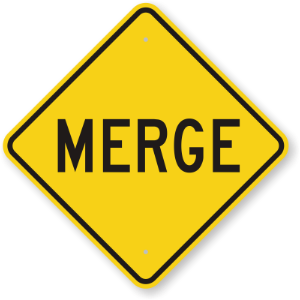


When you merge dataframes together with Pandas, there can be data that is not included in the newly formed Dataframe. Pandas provides four different modes for merging datasets. Depending on *how* you merge your data, there may be rows from one of the datasets not included after the merge.

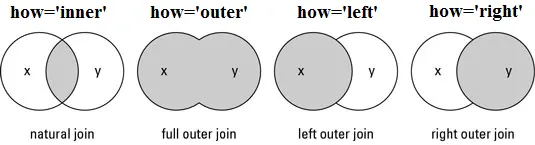

Source: [Data Science Made Simple](https://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/)

Let's start with three datasets this separate but overlapping information.

* Customers - This dataset contains information about who has been shopping at our store (id, name, address, etc.)
* Orders - This dataset contains information about (order id, customer id, amount, date)

In [36]:
# load customer data
df_customers = pd.read_csv('files/customers.csv')
df_customers

,customer_id,first_name,last_name,email,address,city,state,zipcode
0,1,George,Washington,gwashington@usa.gov,3200 Mt Vernon Hwy,Mount Vernon,VA,22121
1,2,John,Adams,jadams@usa.gov,1250 Hancock St,Quincy,MA,2169
2,3,Thomas,Jefferson,tjefferson@usa.gov,931 Thomas Jefferson Pkwy,Charlottesville,VA,22902
3,4,James,Madison,jmadison@usa.gov,11350 Constitution Hwy,Orange,VA,22960
4,5,James,Monroe,jmonroe@usa.gov,2050 James Monroe Parkway,Charlottesville,VA,22902


In [37]:
# load order data
df_orders = pd.read_csv('files/orders.csv')
df_orders

,order_id,order_date,amount,customer_id
0,1,07/04/1776,$234.56,1
1,2,03/14/1760,$78.50,3
2,3,05/23/1784,$124.00,2
3,4,09/03/1790,$65.50,3
4,5,07/21/1795,$25.50,10
5,6,11/27/1787,$14.40,9


Perform an inner merge and get back rows that have values for both datasets.

In [38]:
# default is inner merge
pd.merge(df_customers, df_orders, on="customer_id")

,customer_id,first_name,last_name,email,address,city,state,zipcode,order_id,order_date,amount
0,1,George,Washington,gwashington@usa.gov,3200 Mt Vernon Hwy,Mount Vernon,VA,22121,1,07/04/1776,$234.56
1,2,John,Adams,jadams@usa.gov,1250 Hancock St,Quincy,MA,2169,3,05/23/1784,$124.00
2,3,Thomas,Jefferson,tjefferson@usa.gov,931 Thomas Jefferson Pkwy,Charlottesville,VA,22902,2,03/14/1760,$78.50
3,3,Thomas,Jefferson,tjefferson@usa.gov,931 Thomas Jefferson Pkwy,Charlottesville,VA,22902,4,09/03/1790,$65.50


Perform an outer merge and get back all possible rows for both datasets.

In [39]:
# outer merge
pd.merge(df_customers, df_orders, on="customer_id", how="outer")

,customer_id,first_name,last_name,email,address,city,state,zipcode,order_id,order_date,amount
0,1,George,Washington,gwashington@usa.gov,3200 Mt Vernon Hwy,Mount Vernon,VA,22121.0,1.0,07/04/1776,$234.56
1,2,John,Adams,jadams@usa.gov,1250 Hancock St,Quincy,MA,2169.0,3.0,05/23/1784,$124.00
2,3,Thomas,Jefferson,tjefferson@usa.gov,931 Thomas Jefferson Pkwy,Charlottesville,VA,22902.0,2.0,03/14/1760,$78.50
3,3,Thomas,Jefferson,tjefferson@usa.gov,931 Thomas Jefferson Pkwy,Charlottesville,VA,22902.0,4.0,09/03/1790,$65.50
4,4,James,Madison,jmadison@usa.gov,11350 Constitution Hwy,Orange,VA,22960.0,NaN,NaN,NaN
5,5,James,Monroe,jmonroe@usa.gov,2050 James Monroe Parkway,Charlottesville,VA,22902.0,NaN,NaN,NaN
6,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,07/21/1795,$25.50
7,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,11/27/1787,$14.40


Perform a left merge and only include the rows in the `df_customers` dataset.

In [40]:
# left merge
pd.merge(df_customers, df_orders, on="customer_id", how="left")

,customer_id,first_name,last_name,email,address,city,state,zipcode,order_id,order_date,amount
0,1,George,Washington,gwashington@usa.gov,3200 Mt Vernon Hwy,Mount Vernon,VA,22121,1.0,07/04/1776,$234.56
1,2,John,Adams,jadams@usa.gov,1250 Hancock St,Quincy,MA,2169,3.0,05/23/1784,$124.00
2,3,Thomas,Jefferson,tjefferson@usa.gov,931 Thomas Jefferson Pkwy,Charlottesville,VA,22902,2.0,03/14/1760,$78.50
3,3,Thomas,Jefferson,tjefferson@usa.gov,931 Thomas Jefferson Pkwy,Charlottesville,VA,22902,4.0,09/03/1790,$65.50
4,4,James,Madison,jmadison@usa.gov,11350 Constitution Hwy,Orange,VA,22960,NaN,NaN,NaN
5,5,James,Monroe,jmonroe@usa.gov,2050 James Monroe Parkway,Charlottesville,VA,22902,NaN,NaN,NaN


Perform a right merge and only include rows in the `df_orders` dataset.

In [41]:
# right merge
pd.merge(df_customers, df_orders, on="customer_id", how="right")

,customer_id,first_name,last_name,email,address,city,state,zipcode,order_id,order_date,amount
0,1,George,Washington,gwashington@usa.gov,3200 Mt Vernon Hwy,Mount Vernon,VA,22121.0,1,07/04/1776,$234.56
1,3,Thomas,Jefferson,tjefferson@usa.gov,931 Thomas Jefferson Pkwy,Charlottesville,VA,22902.0,2,03/14/1760,$78.50
2,2,John,Adams,jadams@usa.gov,1250 Hancock St,Quincy,MA,2169.0,3,05/23/1784,$124.00
3,3,Thomas,Jefferson,tjefferson@usa.gov,931 Thomas Jefferson Pkwy,Charlottesville,VA,22902.0,4,09/03/1790,$65.50
4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,07/21/1795,$25.50
5,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,11/27/1787,$14.40


### Transpose

Rotate the data along the diagonal axes.

In [44]:
# transpose function
df_customers.transpose()

,0,1,2,3,4
customer_id,1,2,3,4,5
first_name,George,John,Thomas,James,James
last_name,Washington,Adams,Jefferson,Madison,Monroe
email,gwashington@usa.gov,jadams@usa.gov,tjefferson@usa.gov,jmadison@usa.gov,jmonroe@usa.gov
address,3200 Mt Vernon Hwy,1250 Hancock St,931 Thomas Jefferson Pkwy,11350 Constitution Hwy,2050 James Monroe Parkway
city,Mount Vernon,Quincy,Charlottesville,Orange,Charlottesville
state,VA,MA,VA,VA,VA
zipcode,22121,2169,22902,22960,22902


In [45]:
# transpose shortcut
df_customers.T

,0,1,2,3,4
customer_id,1,2,3,4,5
first_name,George,John,Thomas,James,James
last_name,Washington,Adams,Jefferson,Madison,Monroe
email,gwashington@usa.gov,jadams@usa.gov,tjefferson@usa.gov,jmadison@usa.gov,jmonroe@usa.gov
address,3200 Mt Vernon Hwy,1250 Hancock St,931 Thomas Jefferson Pkwy,11350 Constitution Hwy,2050 James Monroe Parkway
city,Mount Vernon,Quincy,Charlottesville,Orange,Charlottesville
state,VA,MA,VA,VA,VA
zipcode,22121,2169,22902,22960,22902


### Pivot Tables
Sometimes you get what is called "long" or "stacked" data (streaming values from an instrument or periodic observational data). Data in this shape can be difficult to analyze.

In [46]:
community_centers = pd.read_csv("files/community-center.csv")
community_centers.head()

,date,center_name,attendance_count
0,2022-04-14,Paulson Community Center,22
1,2022-04-14,Phillips Community Center,34
2,2022-04-14,Ammon Community Center,2
3,2022-04-14,Arlington Community Center,16
4,2022-04-14,Brookline Community Center,44


In [49]:
pivoted_community_centers = community_centers.pivot(index="date",columns="center_name",values="attendance_count")
pivoted_community_centers.head()

center_name,Ammon Community Center,Ammon Park,Ammon Pool,Arlington Community Center,Arlington Field,Brookline Community Center,Burgwin Field,Frazier Park,Frick Environmental Center,Gladstone Field,...,Paulson Community Center,Paulson Field,Phillips Community Center,Phillips Park Field,Schenley Ice Rink,Warrington Community Center,Warrington Field,West Penn Community Center,West Penn Fields,West Penn Pool
date,,,,,,,,,,,,,,,,,,,,,
2011-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN
2011-03-08,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2011-03-09,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,...,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-10,1.0,NaN,NaN,NaN,NaN,54.0,NaN,NaN,NaN,NaN,...,NaN,NaN,32.0,NaN,NaN,2.0,NaN,1.0,NaN,NaN
2011-03-11,19.0,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,...,5.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
pivoted_community_centers["Brookline Community Center"].sum()

344401.0

## Data Visualization



* Two interfaces (or "data structures" to be consistent with how we've been talking in these workshops)
    * `pyplot` - which is designed to resemble the *not pythonic* plotting interface of MATLAB
        * You programmatically issue commands to build your plot
    * The "object oriented" and more *pythonic* interfaces, consisting of 
        * `Figure` - a "data structure" that contains the figure. Has parameters and methods for setting the physical size of the visualzations, saving the visualization as an image to disk, etc. Usually stored in the `fig` variable.
        * `Axes` - a "data structure" that contains the specific elements of the visualization. You can have more than one axes if you want to create parallel plots. Has parameters and methods for setting the tick marks, legend, axis labels, etc. Usually stored in the `ax` variable.

### matplotlib and Jupyter Notebooks

* In order to use `matplotlib` with Jupyter Notebooks, you need to run this "magic" command
    * It is best to put it at the top of your notebook when you import libraries
* This command tells matplotlib to render the plots inside the notebook

In [56]:
# tell matplotlib to render data visualizations in the notebook
%matplotlib inline

* The convention is to import the pyplot interface as `plt`

In [157]:
# load pyplot and give it the name plt
import matplotlib.pyplot as plt

* Now whenever you want to create a data vizualization, you will methods part of the `plt` "data structure"

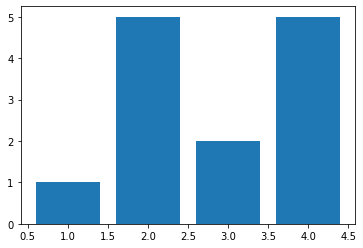

In [158]:
# create some categorical data
labels = ["cats", "dogs", "chickens", "spiders"]
x_pos = [1,2,3,4]
y = [1,5,2,5]

# plot as a bar chart
plt.bar(x_pos, y);
#plt.xticks(x_pos, labels);

We can change the X values and save the figure to a file.

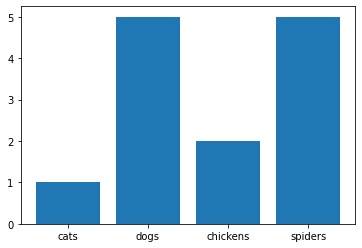

In [60]:
# create some categorical data
labels = ["cats", "dogs", "chickens", "spiders"]
x_pos = [1,2,3,4]
y = [1,5,2,5]

# plot as a bar chart
plt.bar(x_pos, y);
plt.xticks(x_pos, labels);

plt.savefig('my-sweet-chart.png')

### Plotting from Pandas

Pandas has a nice interface to matplotlib using the `plot()` method on both Series and Dataframes. Check out the [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) for the most complete information.

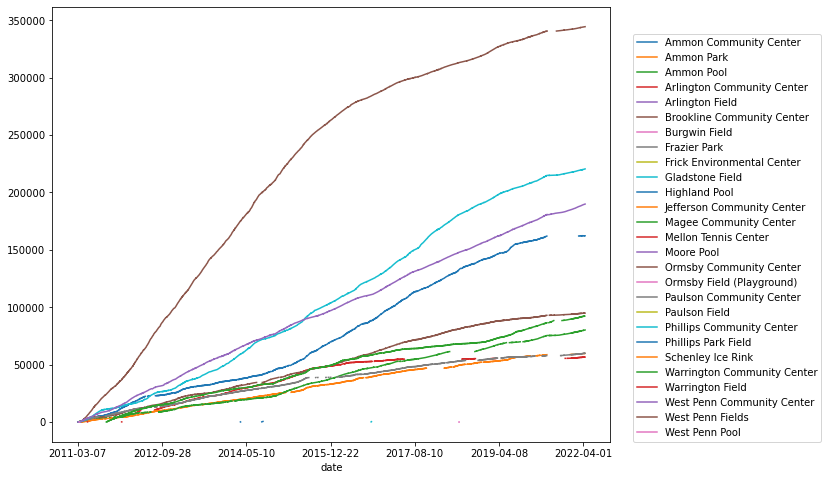

In [67]:
# plot the cumulative sum of attendance at each community center
pivoted_community_centers.cumsum().plot(figsize=(10,8))
# move the legend to the left of the graph
plt.legend(loc=(1.04,0)); # semicolon to clean up output

<AxesSubplot:ylabel='None'>

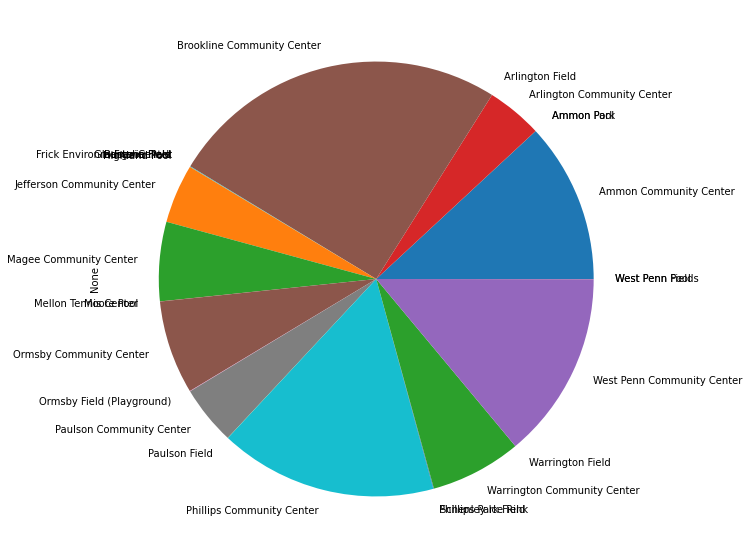

In [159]:
# create a pie chart of community center attendance
pivoted_community_centers.sum().plot(kind="pie", figsize=(10,10))

This plot has too much going on, lets reshape the data and combine all the centers that have attendance counts lower than a threshold value.

<AxesSubplot:title={'center':'Community Center Attendance'}>

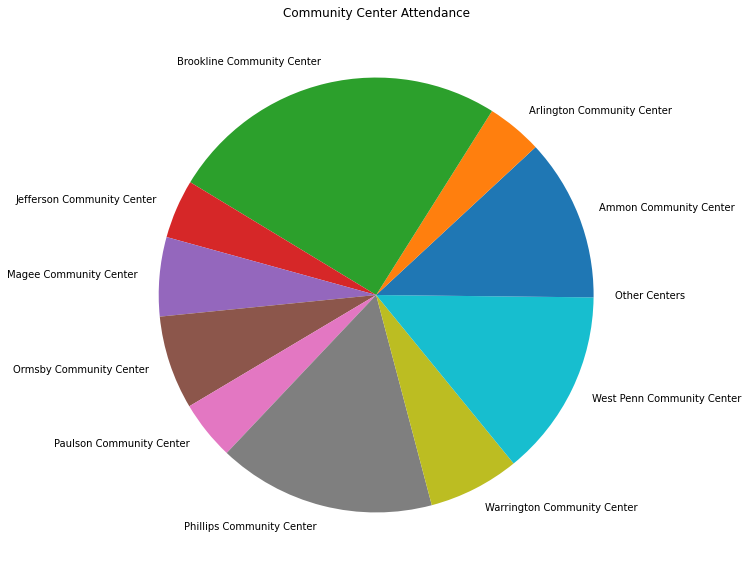

In [94]:
# set the threshold to 1000
threshold = 1000

# create a mask of centers with attendance above the threshold
mask = pivoted_community_centers.sum() >  threshold

# create a series of the centers below the threshold
other_centers = pivoted_community_centers.sum()[~mask] #tilde inverts the mask, like "not"

# create a copy of popular community centers
popular_centers = pivoted_community_centers.sum()[mask].copy()

# add the less popular centers as a single entry
popular_centers['Other Centers'] = other_centers.sum()

# plot as a 10 by 10 pie chart with empty label
popular_centers.plot(kind="pie", figsize=(10,10), label="", title="Community Center Attendance")

### Word Cloud
 
Not all data that we want to visualize is best done in a numerical or relationship based visual representation.  An example might be word counts, or word popularity.  Plotting works on a histogram isn't compelling, but a word cloud (maybe) is! 

In [ ]:
conda install --channel=conda-forge wordcloud  --yes

In [97]:
# import wordcloud and the stop words list
from wordcloud import WordCloud, STOPWORDS 

In [98]:
imagine_lyrics = """
Imagine there's no countries
It isn't hard to do
Nothing to kill or die for
And no religion, too
Imagine all the people
Living life in peace
You, you may say I'm a dreamer
But I'm not the only one
I hope someday you will join us
And the world will be as one
Imagine no possessions
I wonder if you can
No need for greed or hunger
A brotherhood of man
Imagine all the people
Sharing all the world
You, you may say I'm a dreamer
But I'm not the only one
I hope someday you will join us
And the world will live as one
"""

Next, we'll use the string methods to clean up the text and put the words in a list:

In [99]:
cleaned_imagine_lyrics = imagine_lyrics.lower().replace(",","").replace("'","")

The final step is creating the actual word cloud...  let's look at the code:

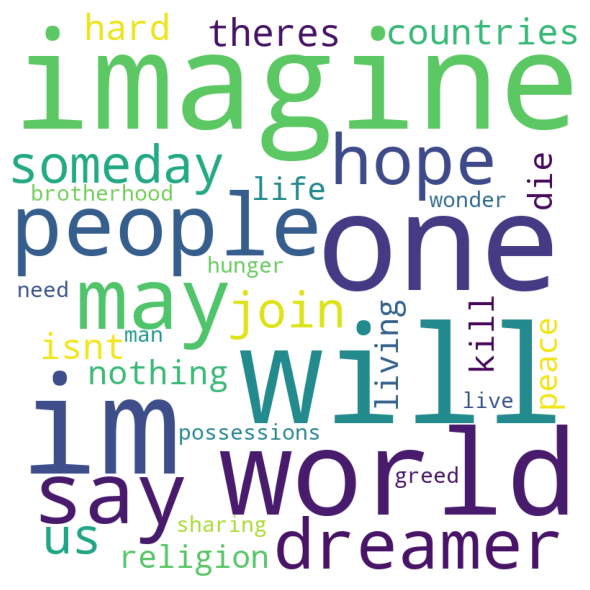

In [164]:
# specify the settings of the wordcloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10)

# generate the wordcloud with the cleaned lyrics
wordcloud.generate(cleaned_imagine_lyrics) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 


## Data Analysis

**Descriptive Statistics**
- Describe the data and characteristics of the data
- Examples: mean, standard deviation

**Inferential Statistics**
- Makes inferences from the data to more general conditions (e.g. population)
- Examples: hypothesis testing, point estimation


In [167]:
column_names = ["length", "number_of_steps", "transit_rider_count", "total_population"]

# calculate descriptive statistics on a specific list of columns
steps[column_names].describe()

,length,number_of_steps,transit_rider_count,total_population
count,854.000000,738.000000,556.000000,556.000000
mean,168.282201,52.387534,110.523381,675.046763
std,131.958931,49.765545,165.714618,341.260881
min,0.000000,0.000000,0.000000,13.000000
25%,94.000000,18.000000,19.000000,427.000000
50%,130.000000,38.500000,65.000000,661.500000
75%,220.000000,72.750000,137.000000,874.000000
max,1235.000000,378.000000,1643.000000,2438.000000


In [112]:
# load the statistics module from the scipy package
import scipy.stats as stats

### Z-scores, and the hunt for outliers

The Z-score is the location of each sample value (X) within a distribution.

It is a number that establishes the relationship between:
- The sample value
- The mean
- The standard deviation

The number is a numerical value that specifies the distance from the mean by counting the number of standard deviations. +/- indicates direction.

Consider the following normal distribution:

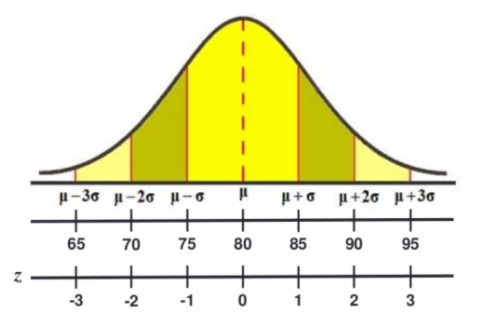

In the above distribution we can consider cases of X and the resulting Z-score...

|X|Z-score|
|---|----|
|90|2|
|75|-1|

**What is a Z-score good for?**
- Determine where on a distribution a particular score is located
- Standardized entire distributions, making them comparable
- Detecting outliers
    - Mathematically distinguish scores that are very far from the typical response
    - Systematic, adopted approach to ignoring problematic data


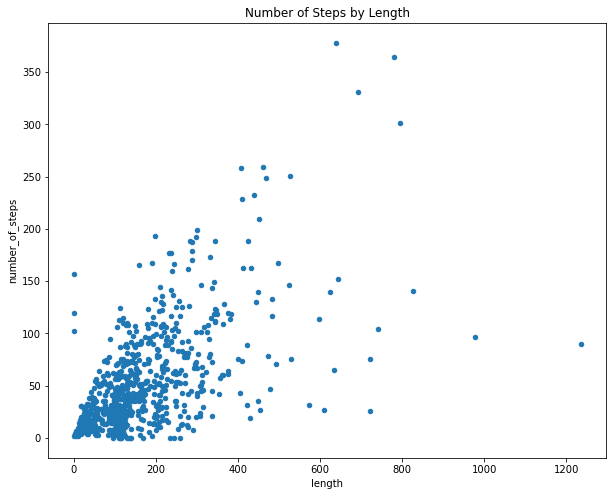

In [133]:
# create a scatter plot of pittsburgh step count and length
steps.plot(kind="scatter", 
           x="length", 
           y="number_of_steps", 
           title="Number of Steps by Length", 
           figsize=(10,8));

We have some outlier values, lets remove those with statistics.

In [140]:
# create a new dataframe of just the step count and length with no missing values
steps_len_num = steps[["length", "number_of_steps"]].dropna()
steps_len_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 1048
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   length           730 non-null    float64
 1   number_of_steps  730 non-null    float64
dtypes: float64(2)
memory usage: 17.1 KB


In [127]:
# compute the z-score of the length and number of steps columns, then take the absolute value
length_steps_zscore = stats.zscore(steps_len_num).abs()
length_steps_zscore.describe()

,length,number_of_steps
count,730.000000,730.000000
mean,0.710536,0.723041
std,0.704143,0.691279
min,0.003276,0.002120
25%,0.314906,0.320458
50%,0.518523,0.620821
75%,0.945413,0.902148
max,7.729494,6.532945


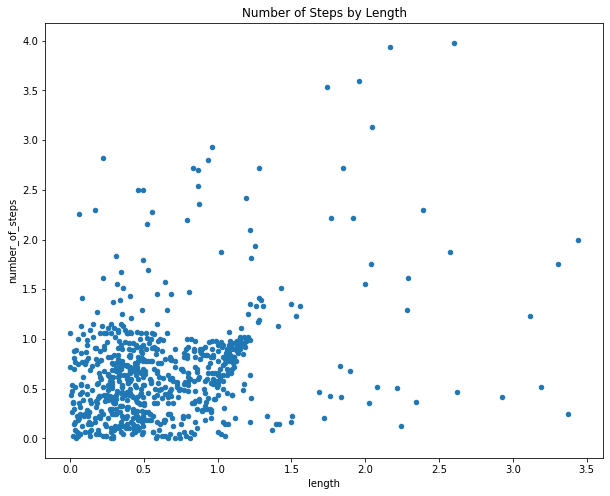

In [174]:
# create a mask of z-score values less than 4
mask = length_steps_zscore < 4
# filter out the outliers
steps_no_outliers = length_steps_zscore[mask].dropna()

# plot the new data without outliers
steps_no_outliers.plot(kind="scatter", 
           x="length", 
           y="number_of_steps", 
           title="Number of Steps by Length", 
           figsize=(10,8));

### Correlation

A correlation exists when two variables are related in some way. The linear correlation coefficient measures the strength of this relationship.

The coefficient ranges between -1 and 1:
- r = 1 is a perfectly positive correlation
- r = 0 is absolutely no correlation 
- r = -1 is a perfectly negative correlation

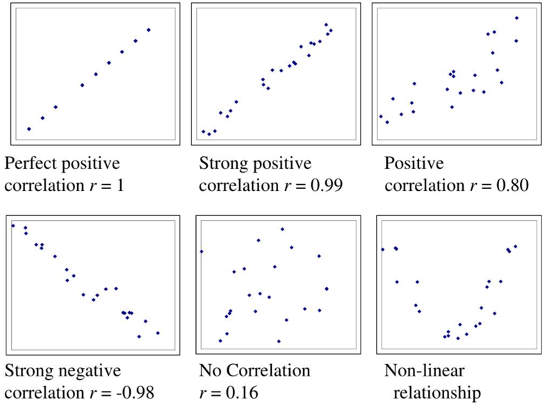

$r^{2}$, the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

Example: The height and weight of a set of runners have a correlation coefficient of r = 0.77.  The $r^{2}$ value is thus 0.77 * 0.77, or 0.59. This means that 59% of the runners’ heights can be explained by the relationship between height and weight. It also means that 41% of the variations in weight cannot be explained by the relationship between height and weight.

**Gotchas**

- Correlation is not causation. For instance, there is a strong correlation ($r^{2}$ = 0.92) between PhD’s awarded in civil engineering and US per-captia consumption of mozzarella. ([Example from stats basics](https://www.spcforexcel.com/knowledge/basic-statistics/just-because-there-is-a-correlation))

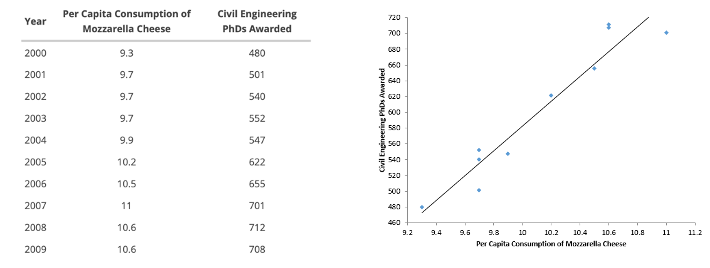

- Watch out for data that come from averages. Averages suppress individual differences (e.g. points far from the regression line).  This can make correlations seem stronger than they really are.

- Non-linear correlations can still exist, but not be modeled by a linear correlation test. For instance, logarithmic correlations are common.

Alright, let's look at an example.  We're going load two data sets, one that contains obesity estimates by census tract.  The other, the fast food restaurants in the city, indexed with census tract.

In [175]:
pearsonr = stats.pearsonr(steps_no_outliers["length"], steps_no_outliers["number_of_steps"] )
pearsonr

(0.3371691174212872, 1.509307115590057e-20)

In [176]:
# calculate r^2
pearsonr[0] ** 2

0.11368301374264975

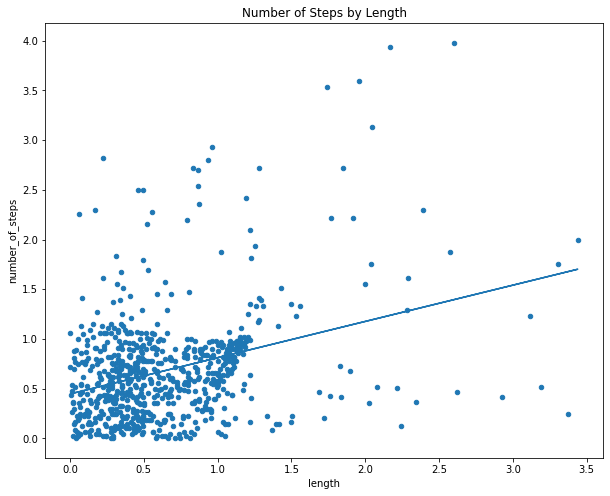

In [177]:
# calculate a regression line using the linear regression function
slope, intercept, r_value, p_value, std_err = stats.linregress(steps_no_outliers["length"], steps_no_outliers["number_of_steps"])

# create a scatter plot of the two variables
# plot the new data without outliers
steps_no_outliers.plot(kind="scatter", 
           x="length", 
           y="number_of_steps", 
           title="Number of Steps by Length", 
           figsize=(10,8));
x = steps_no_outliers["length"]

plt.plot(x, intercept + slope * x, '-');


The upward slope implies that as the length of the staircase goes up so does the number of steps. But, the correlation is not very strong.